# CH10 K-means

- 发现K个簇，每个类的中心采用簇中所含值的均值构成。
- Unsupervised Classification
- 可以通过肘部法则确定k

聚类评价指标
- 轮廓系数(SC)
- 互信息(MI)
- 兰德指数(RI)，调整兰德指数(ARI)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## MLiA

### K-means

#### Helper

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        dataMat.append(curLine)
    return dataMat

#### Distance

In [3]:
# SSE 
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2).A[0])) #la.norm(vecA-vecB)

In [4]:
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [5]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distEclud(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            # SE距离平方
            clusterAssment[i,:] = minIndex,minDist**2
        print (centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [6]:
datMat = np.mat(loadDataSet("./Data/CH10/testSet.txt")).astype(float)

In [7]:
min(datMat[:,0])

matrix([[-5.379713]])

In [8]:
min(datMat[:,1])

matrix([[-4.232586]])

In [9]:
max(datMat[:,1])

matrix([[5.1904]])

In [10]:
max(datMat[:,0])

matrix([[4.838138]])

In [11]:
randCent(datMat,2)

matrix([[-1.3146886 , -2.5030694 ],
        [-0.52429231,  4.06990024]])

In [12]:
datMat[0]

matrix([[1.658985, 4.285136]])

In [13]:
distEclud(datMat[0],datMat[1])

5.184632816681332

In [14]:
myCentroids, clustAssing = kMeans(datMat.A,4)

[[-1.2609484  -1.07910327]
 [ 2.17916804 -0.32325098]
 [-5.27730102  1.00962993]
 [-0.90832273 -4.16026687]]
[[-2.48539592 -0.12335985]
 [ 2.82102866  0.39129192]
 [-3.21690935  1.95590853]
 [-2.37421167 -3.51431367]]
[[-3.083058   -0.4696565 ]
 [ 2.82102866  0.39129192]
 [-2.45009747  2.89275747]
 [-2.9890561  -3.0737179 ]]


In [15]:
# clustAssing[:,0] index
# clustAssing[:,1] error
data_ = np.hstack([clustAssing.A,datMat.A])
data_[data_[:,0]==3,:]

array([[ 3.        ,  5.79840698, -5.379713  , -3.362104  ],
       [ 3.        , 11.88354311,  0.450614  , -3.302219  ],
       [ 3.        ,  0.04154977, -2.786837  , -3.099354  ],
       [ 3.        ,  7.53485393, -0.39237   , -3.963704  ],
       [ 3.        ,  0.66654862, -3.195883  , -2.283926  ],
       [ 3.        ,  0.25893235, -3.403367  , -2.778288  ],
       [ 3.        ,  1.0545148 , -4.007257  , -3.207066  ],
       [ 3.        , 16.33585298,  0.939512  , -4.023563  ],
       [ 3.        ,  1.13010303, -3.674424  , -2.261084  ],
       [ 3.        ,  0.34754263, -2.579316  , -3.497576  ],
       [ 3.        ,  0.75293189, -3.837877  , -3.253815  ],
       [ 3.        ,  2.09566528, -2.121479  , -4.232586  ],
       [ 3.        ,  1.00914283, -3.762093  , -2.432191  ],
       [ 3.        ,  2.52877341, -4.323818  , -3.938116  ],
       [ 3.        ,  1.0500355 , -4.009299  , -2.978115  ],
       [ 3.        ,  0.28190627, -3.171184  , -3.572452  ],
       [ 3.        ,  1.

In [16]:
myCentroids[:,1]

matrix([[-0.4696565 ],
        [ 0.39129192],
        [ 2.89275747],
        [-3.0737179 ]])

#### Visulization

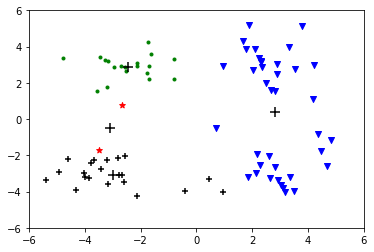

In [17]:
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(data_[data_[:,0]==3,:][:,2],data_[data_[:,0]==3,:][:,3],marker="+",c="black")
plt.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

#### Postprocessing

- 合并最近质心
- 合并使得SSE增幅最小的质心
- 以下不停的运行，随机初始化质心的结果会影响最后的结果。

[[ 0.2603625   1.4431184 ]
 [ 3.11181716 -0.51945266]
 [-1.55698796  1.22551704]]
[[ 2.16902454  3.50190077]
 [ 1.942066   -0.59411112]
 [-2.3558602   1.26983287]]
[[ 2.95977168  3.26903847]
 [-0.03056976 -2.84165565]
 [-2.71580587  2.48817592]]
[[ 2.93386365  3.12782785]
 [-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]


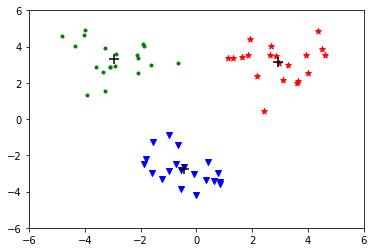

In [18]:
datMat3 = loadDataSet("./Data/CH10/testSet2.txt")
datMat3 = np.mat(datMat3).astype(float)
myCentroids, clustAssing = kMeans(datMat3.A,3)
data_ = np.hstack([clustAssing.A,datMat3.A])
data_[data_[:,0]==3,:]
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(data_[data_[:,0]==3,:][:,2],data_[data_[:,0]==3,:][:,3],marker="+",c="black")
plt.scatter(myCentroids.A[:,0],myCentroids.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

### Bisecting K-means

In [19]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distEclud(np.mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distEclud)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return np.mat(centList), clusterAssment

In [20]:
datMat3 = loadDataSet("./Data/CH10/testSet2.txt")
datMat3 = np.mat(datMat3).astype(float)
centList, myNewAssments = biKmeans(datMat3,3)

[[-0.13187197  0.69436805]
 [ 0.9513127  -0.54106196]]
[[-0.67283794  3.1722195 ]
 [ 0.61495004 -1.69500396]]
[[-0.06953469  3.29844341]
 [-0.32150057 -2.62473743]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  [[453.03348958]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-0.44678883  2.49181206]
 [-4.31171965  3.03134218]]
[[ 1.71544126  3.19785696]
 [-3.58362738  3.28784469]]
[[ 2.76275171  3.12704005]
 [-3.06779095  3.33769884]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  [[77.59224932]] [[29.15724944]]
[[-0.14501058 -2.3794826 ]
 [ 0.17095419 -2.09091422]]
[[-0.54562988 -2.99100569]
 [-0.11576125 -1.92705525]]
[[-0.39994281 -3.1000235 ]
 [-0.6985095  -1.490984  ]]
[[-0.15366667 -3.15354   ]
 [-1.3776246  -1.6522424 ]]
[[-0.05200457 -3.16610557]
 [-1.41084317 -1.873139  ]]
[[-7.11923077e-04 -3.21792031e+00]
 [-1.31198114e+00 -1.96162114e+00]]
[[ 0.07973025 -3.24942808]
 [-1.26873575 -2.07139688]]

#### Visulization

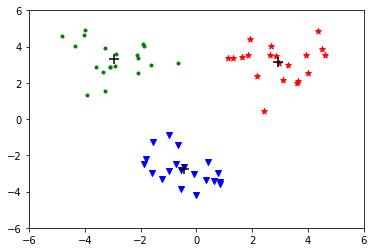

In [21]:
data_ = np.hstack([myNewAssments.A,datMat3.A])
data_[data_[:,0]==3,:]
plt.figure()
plt.scatter(data_[data_[:,0]==0,:][:,2],data_[data_[:,0]==0,:][:,3],marker="*",c="red")
plt.scatter(data_[data_[:,0]==1,:][:,2],data_[data_[:,0]==1,:][:,3],marker="v",c="blue")
plt.scatter(data_[data_[:,0]==2,:][:,2],data_[data_[:,0]==2,:][:,3],marker=".",c="green")
plt.scatter(centList.A[:,0],centList.A[:,1],marker="+",c="black",s=100)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

### EX : Map

In [22]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = np.sin(vecA[0,1]*pi/180) * np.sin(vecB[0,1]*np.pi/180)
    b = np.cos(vecA[0,1]*pi/180) * np.cos(vecB[0,1]*np.pi/180) * \
                      np.cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy


In [23]:
def clusterClubs(numClust=5):
    datList = []
    for line in open('./Data/CH10/places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('./Data/CH10/Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()


[[-122.7676579    45.46153218]
 [-122.65564076   45.3973652 ]]
[[-122.7255474    45.51717564]
 [-122.5783403    45.50954025]]
[[-122.7142141    45.51492203]
 [-122.56818551   45.5102949 ]]
[[-122.70981637   45.51478609]
 [-122.56409551   45.51016235]]
[[-122.70766576   45.51319176]
 [-122.56201911   45.51149539]]
sseSplit, and notSplit:  [[0.35591468]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
[[-122.81014647   45.45580239]
 [-122.67141903   45.41779491]]
[[-122.77132655   45.52464809]
 [-122.67583536   45.50746359]]
[[-122.769877     45.51281758]
 [-122.67211648   45.51340557]]
[[-122.76779508   45.50019   ]
 [-122.6685817    45.5216429 ]]
[[-122.77486818   45.48294173]
 [-122.67406455   45.52831677]]
sseSplit, and notSplit:  [[0.10156322]] [[0.16473616]]
[[-122.6216444    45.41368975]
 [-122.3861237    45.50549409]]
[[-122.57898855   45.51397297]
 [-122.4568086    45.4961344 ]]
sseSplit, and notSplit:  [[0.099093]] [[0.19117852]]
the bestCentToSplit is:  0
the len 

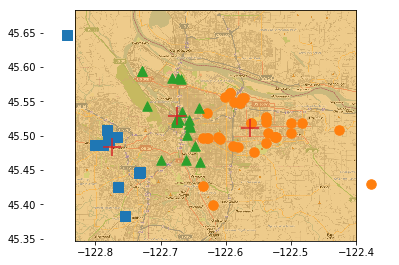

In [24]:
clusterClubs(3)

## Sklearn

### EX0 : TestSet

In [96]:
datMat = loadDataSet("./Data/CH10/testSet.txt")
X = np.mat(datMat).astype(float).A

In [106]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=4)
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

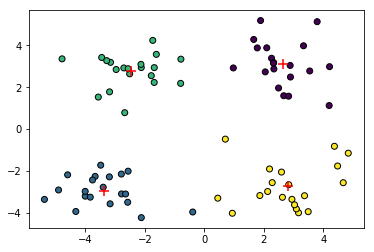

In [107]:
plt.scatter(X[:, 0], X[:, 1],c=est.labels_.astype(np.float), edgecolor='k')
plt.scatter(est.cluster_centers_[:,0],est.cluster_centers_[:,1],marker="+",c="red",s=100)
plt.show()

怎么确定多少个质心？

In [108]:
est.inertia_

149.95430467642635

### EX1 : TestSet2

In [62]:
datMat = loadDataSet("./Data/CH10/testSet2.txt")
X = np.mat(datMat).astype(float).A

In [65]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=3)
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

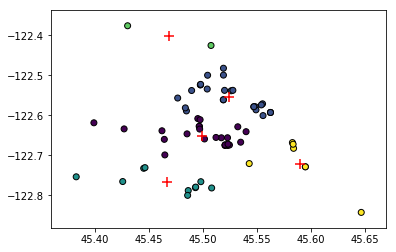

In [93]:
plt.scatter(X[:, 0], X[:, 1],c=est.labels_.astype(np.float), edgecolor='k')
plt.scatter(est.cluster_centers_[:,0],est.cluster_centers_[:,1],marker="+",c="red",s=100)

plt.show()

### EX3 :  Place

In [70]:
datMat

[['Dolphin II',
  '10860 SW Beaverton-Hillsdale Hwy',
  'Beaverton, OR',
  '45.486502',
  '-122.788346'],
 ['Hotties',
  '10140 SW Canyon Rd.',
  'Beaverton, OR',
  '45.493150',
  '-122.781021'],
 ['Pussycats',
  '8666a SW Canyon Road',
  'Beaverton, OR',
  '45.498187',
  '-122.766147'],
 ['Stars Cabaret',
  '4570 Lombard Ave',
  'Beaverton, OR',
  '45.485943',
  '-122.800311'],
 ['Sunset Strip',
  '10205 SW Park Way',
  'Beaverton, OR',
  '45.508203',
  '-122.781853'],
 ['Vegas VIP Room',
  '10018 SW Canyon Rd',
  'Beaverton, OR',
  '45.493398',
  '-122.779628'],
 ['Full Moon Bar and Grill',
  '28014 Southeast Wally Road',
  'Boring, OR',
  '45.430319',
  '-122.376304'],
 ['505 Club', '505 Burnside Rd', 'Gresham, OR', '45.507621', '-122.425553'],
 ['Dolphin',
  '17180 McLoughlin Blvd',
  'Milwaukie, OR',
  '45.399070',
  '-122.618893'],
 ['Dolphin III',
  '13305 SE McLoughlin BLVD',
  'Milwaukie, OR',
  '45.427072',
  '-122.634159'],
 ['Acropolis',
  '8325 McLoughlin Blvd',
  'Portlan

In [84]:
datMat = loadDataSet("./Data/CH10/places.txt")
X = np.mat(datMat).A[:,3:5].astype(float)

In [88]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=5)
est.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
est.cluster_centers_

array([[  45.49920908, -122.65078825],
       [  45.52437896, -122.55535315],
       [  45.4665528 , -122.7680632 ],
       [  45.46897   , -122.4009285 ],
       [  45.59011757, -122.72072414]])

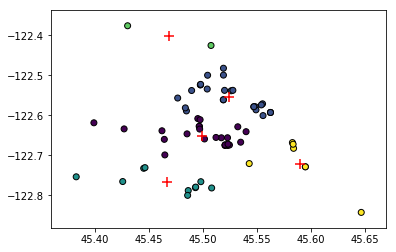

In [92]:
plt.scatter(X[:, 0], X[:, 1],
           c=est.labels_.astype(np.float), edgecolor='k')
plt.scatter(est.cluster_centers_[:,0],est.cluster_centers_[:,1],marker="+",c="red",s=100)
plt.show()

## K-Means++